# Лабораторная работа 5 Моделирование движения электрических зарядов в постоянных электрических и магнитных полях

## Два раза кликните по блоку ниже (ФИО/Группа) и заполните ваше ФИО и номер группы.

ФИО: Черников Святослав Сергеевич

Группа: РИ-221055

## Подключите необходимые библиотеки для лабораторной работы

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%matplotlib inline

## Теория

### Движение заряда в электромагнитном поле

Как известно, на электрический заряд q, движущийся в скрещенных электрическом $\vec{E}$ и магнитном $\vec{B}$ полях со скоростью $\vec{v}$, действует сила Лоренца $\vec{F}$

$$\vec{F} = q(\vec{E} + [\vec{v} \times  \vec{B}])(1.1)$$

В соответствии со вторым законом Ньютона

$$\frac{d\vec{p}}{dt} = \frac{dm\vec{v}}{dt} = \vec{F} (1.2)$$

где $m$ — масса заряда, при нерелятивистском движении равная массе покоя $m_0$, и зависящая от скорости по закону

$$m = \frac{m_0}{\sqrt(1-|\vec{v}|^2/c^2)} (..3)$$

при движении со скоростями, близкими к скорости света.
Следовательно, для полного описания движения заряженной частицы необходимо при заданных напряженностях электрического и магнитного полей решить задачу
Коши системы, состоящей из трех дифференциальных уравнений второго порядка:

$$
\begin{matrix}
\frac{d}{dt}p_x = \frac{d}{dt}(mv_x)=q(E_x(x,y,z)+[\vec{v}\times \vec{B}(x,y,z)]_x)\\
\frac{d}{dt}p_y = \frac{d}{dt}(mv_y)=q(E_y(x,y,z)+[\vec{v}\times \vec{B}(x,y,z)]_y)\\
\frac{d}{dt}p_z = \frac{d}{dt}(mv_z)=q(E_z(x,y,z)+[\vec{v}\times \vec{B}(x,y,z)]_z)
\end{matrix}
(1.4)
$$

где индексы $x$, $y$, $z$ обозначают проекции векторов на
соответствующую ось выбранной системы координат. Аналитическое решение системы
(1.4) может быть найденного для относительно небольшого числа случаев, поэтому
для описания движения заряженных частиц в электромагнитных полях необходимо
проведение численных расчетов.

### Моделирование движения электрических зарядов в постоянном магнитном моле

Для описания движения заряда в постоянном магнитном поле при заданной зависимости напряженности магнитного поля от координат необходимо решить следующую систему ДУ:

$$
\begin{matrix}
\frac{dp_x}{dt} = \frac{dmv_x}{dt} = q[\vec{v}\times \vec{B}(x,y,z)]_x\\ 
\frac{dp_y}{dt} = \frac{dmv_y}{dt} = q[\vec{v}\times \vec{B}(x,y,z)]_y\\ 
\frac{dp_z}{dt} = \frac{dmv_z}{dt} = q[\vec{v}\times \vec{B}(x,y,z)]_z
\end{matrix}
(1.37)
$$

Далее в данном разделе рассмотрим моделирование движения электрических зарядов в постоянном однородном магнитном поле $\vec{B}$ при релятивистских и нерелятивистских скоростях. При движении со скоростями много меньшими скорости света
система ДУ принимает вид

$$
\begin{matrix}
\frac{dv_x}{dt} = \frac{q}{m_0}[\vec{v}\times \vec{B}]_x\\ 
\frac{dv_y}{dt} = \frac{q}{m_0}[\vec{v}\times \vec{B}]_y\\ 
\frac{dv_z}{dt} = \frac{q}{m_0}[\vec{v}\times \vec{B}]_z
\end{matrix}
(1.38)
$$

Предваряя численное решение системы ДУ (1.38), введем безразмерные переменные $\tilde{t} = \frac{t}{T}$, B $\vec{\tilde{B}} = \vec{B}/|\vec{B}|$, $\vec{\tilde{v}}=\vec{v}/c$ ($c$ - скорость света), $\vec{\tilde{R}} = \vec{R}/cT$ в которых система (1.38) принимает следующий вид:

$$
\begin{matrix}
\frac{d}{dt}\vec{v}_x = \frac{qT|\vec{B}|}{m_0}[\vec{v}\times \vec{B}]_x\\ 
\frac{d}{dt}\vec{v}_y = \frac{qT|\vec{B}|}{m_0}[\vec{v}\times \vec{B}]_y\\ 
\frac{d}{dt}\vec{v}_z = \frac{qT|\vec{B}|}{m_0}[\vec{v}\times \vec{B}]_z
\end{matrix}
(1.39)
$$

Для выбора единиц измерения времени заметим, что на электрический заряд, движущийся в плоскости, перпендикулярной напряженности магнитного поля, действует сила, перпендикулярная его скорости. Следовательно, в данном случае заряд будет двигаться по окружности радиуса $R$ (ларморовской окружности), который можно
найти из условия равенства центробежной силы и силы Лоренца


$$\frac{m_0v^2}{R} = qv|\vec{B}| (1.40)$$

Откуда

$$R = \frac{m_0v}{q|\vec{B}|} (1.41)$$

Вспоминая, что период обращения материальной точки, двигающейся по окружности с равномерной скоростью, равен длине окружности, деленной на модуль линейной скорости, и используя (1.41), найдем

$$T = \frac{2\pi R}{v} = \frac{2\pi m_0}{qt|\vec{B}|} (1.42)$$

Из (1.42) видно, что выбор периода обращения заряда по ларморовской окружности в качестве единицы измерения времени позволяет записать систему ДУ (1.39) в следующем виде:

$$
\begin{matrix}
\frac{d\vec{v}_x}{dt} = 2\pi[\vec{v}\times \vec{B}]_x = 2\pi(\vec{v}_y\vec{B}_z-\vec{v}_z\vec{B}_y)\\ 
\frac{d\vec{v}_y}{dt} = 2\pi[\vec{v}\times \vec{B}]_y= 2\pi(\vec{v}_x\vec{B}_z-\vec{v}_z\vec{B}_x)\\ 
\frac{d\vec{v}_z}{dt} = 2\pi[\vec{v}\times \vec{B}]_z= 2\pi(\vec{v}_x\vec{B}_y-\vec{v}_y\vec{B}_x)
\end{matrix}
(1.43)
$$

Отметим универсальность системы ДУ (1.43), заключающуюся в том, что в выбранной системе единиц коэффициенты системы не зависят от параметров заряда и
напряженности магнитного поля, которые входят в безразмерные начальные условия:
1. Радиус-вектор начального положения заряда

$$\vec{\tilde{R}}_0 = \frac{\vec{R}}{cT}$$

2. Вектор начальной скорости

$$\vec{\tilde{v}}_0 = \frac{\vec{v}}{c}$$

В однородном поле система уравнений (1.43) является замкнутой, так как уравнения зависят только от трех неизвестных функций $\tilde{v}_x(t)$, $\tilde{v}_y(t)$, $\tilde{v}_z(t)$.
Найдя численное решение (1.43), далее интегрированием зависимостей $\tilde{v}_x(t)$, $\tilde{v}_y(t)$,
$\tilde{v}_z(t)$ можно определить зависимости $\tilde{x}(t)$, $\tilde{y}(t)$, $\tilde{z}(t)$. Однако оказывается более удобным дополнить (1.43) тремя уравнениями для координат:

$$
\begin{matrix}
\frac{d\tilde{x}}{dt} = \tilde{v}_x \\
\frac{d\tilde{x}}{dt} = \tilde{v}_x \\
\frac{d\tilde{x}}{dt} = \tilde{v}_x
\end{matrix}
(1.44)
$$
так как, решив более общую систему ДУ, состоящую из 6 дифференциальных уравнений, одновременно можно найти зависимости $\tilde{x}(t)$, $\tilde{y}(t)$, $\tilde{z}(t)$ и $\tilde{v}_x(t)$, $\tilde{v}_y(t)$, $\tilde{v}_z(t)$. Дополнительный аргумент в пользу данного подхода состоит в том, что общая система
уравнений распадается на две независимые системы только для однородного магнитного поля. Для неоднородного поля следует решать систему ДУ, состоящую из 6 дифференциальных уравнений первого порядка.

#### Задание. Создайте функцию правой части уравнения 1.43

In [3]:
import numpy as np
def LorenzForce(t, z):
    """
    Задание функции, возвращающей значения первых производных 
    системы ДУ, описывающей движение частицы в магнитном поле

    Args:
        t: название
        z: название
    """
    global H
    x, vx, y, vy, z, vz = z
    Hx, Hy, Hz = H
    
    dxdt = vx
    dvxdt = 2 * np.pi * (vy * Hz - vz * Hy)
    dydt = vy
    dvydt = 2 * np.pi * (vz * Hx - vx * Hz)
    dzdt = vz
    dvzdt = 2 * np.pi * (vx * Hy - vy * Hx)

    return [dxdt, dvxdt, dydt, dvydt, dzdt, dvzdt]

#### Задание построить траекторию движения заряда в постоянном магнитном поле с помощью функции LorenzForce()

Для решения ДУ можно использовать решатели дифференциальных уравнений Python [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html)

Text(0.5, 0, 'Ось Z')

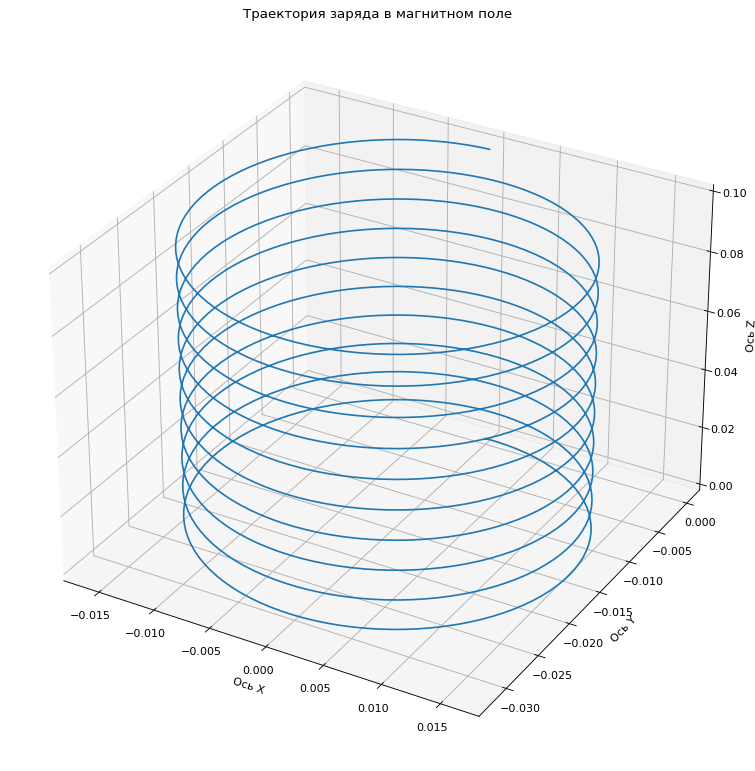

In [5]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
global H
H = [0, 0, 1] # напряженность магнитного поля

x0 = 0
y0 = 0
z0 = 0
vx0 = 0.1
vy0 = 0
vz0 = 0.01
R0 = [x0, vx0, y0, vy0, z0, vz0]
T = [0, 10]

solve = solve_ivp(LorenzForce, T, R0, max_step = 10/1024)

tf = solve.t 
R = solve.y


fig = plt.figure(figsize=(12, 12), dpi=80)
ax = fig.add_subplot(projection = '3d')
ax.plot(R[0,:], R[2,:], R[4,:])

ax.set_title('Траектория заряда в магнитном поле')
ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_zlabel('Ось Z')

#### Задание. Постройте проекции траектории движения на соответствующие координатные плоскости

0 4
2 4
4 4


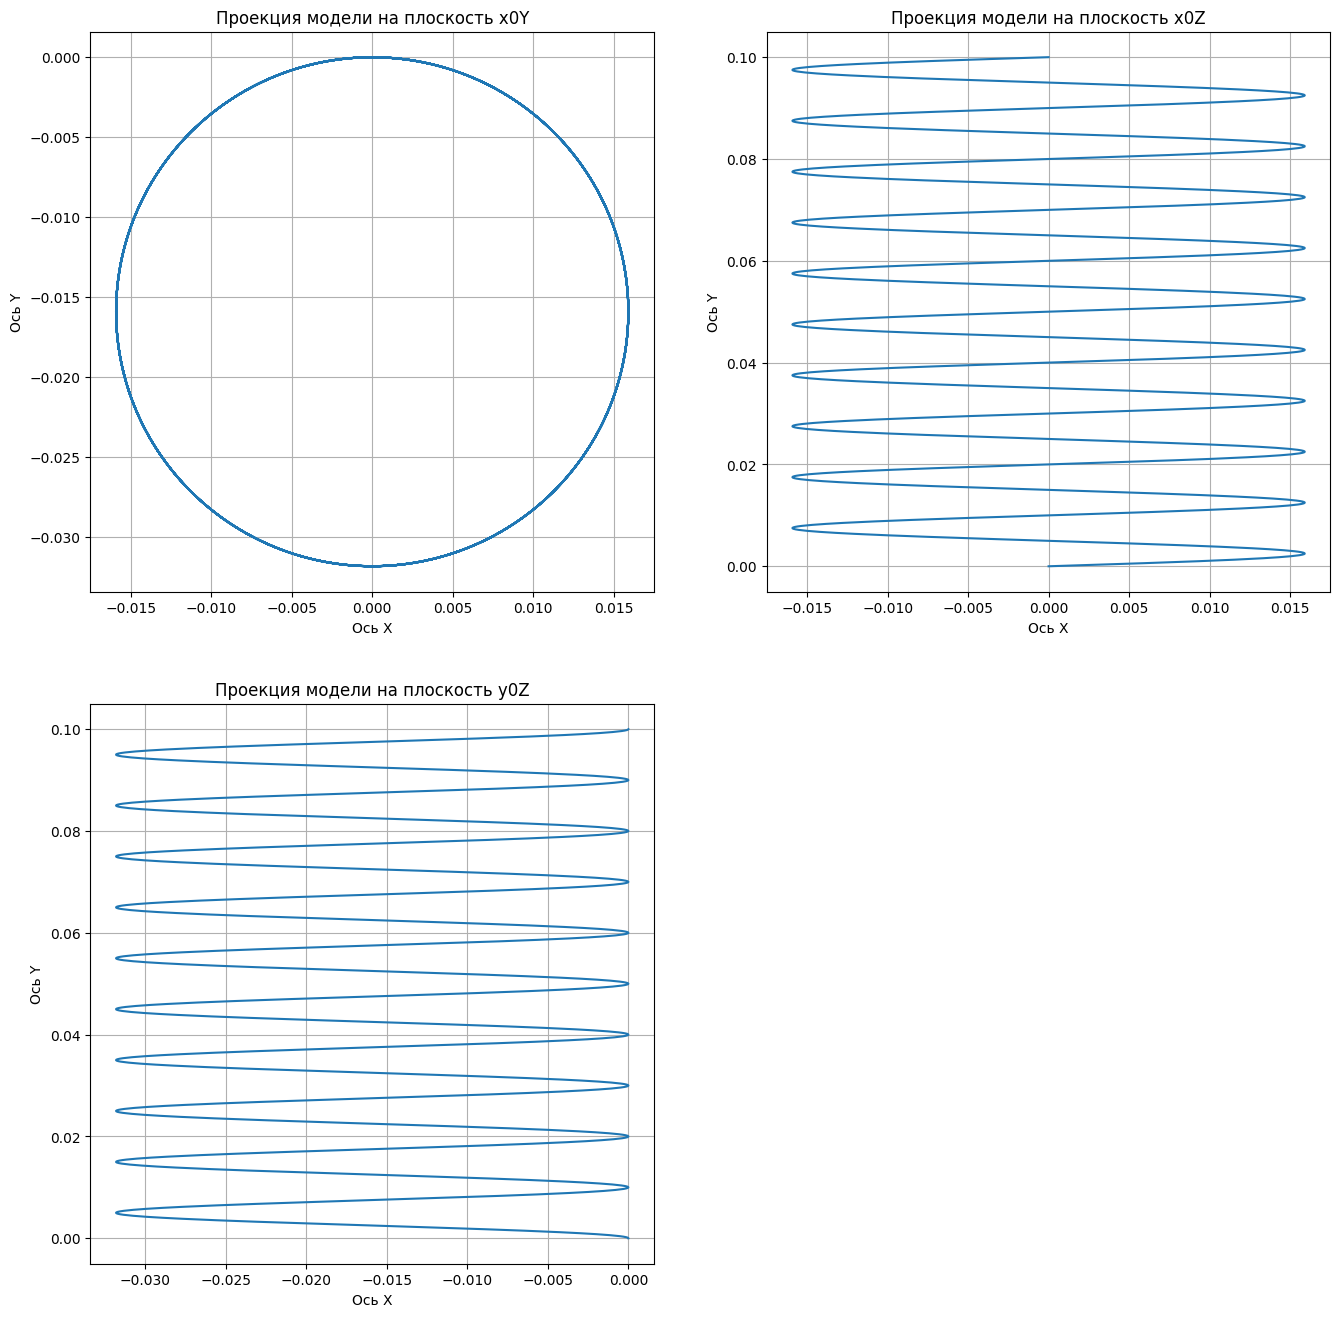

In [25]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

LIST_OF_VARIABLES = ["x0Y","x0Z","y0Z"]

fig = plt.figure(figsize=(16, 16), dpi = 100)
axis1 = fig.add_subplot(221)
axis2 = fig.add_subplot(222)
axis3 = fig.add_subplot(223)

LIST_OF_AXISES = [axis1,axis2,axis3]

"""Счётчики для аргументов"""
counter_1 = 0 
counter_2 = 2

for axis in range(len(LIST_OF_AXISES)):
    current_axis = LIST_OF_AXISES[axis]
    current_axis.plot(R[counter_1], R[counter_2])
    name_of_axis = LIST_OF_VARIABLES[axis]
    current_axis.set_title(f"Проекция модели на плоскость {name_of_axis}")
    current_axis.set_xlabel("Ось X")
    current_axis.set_ylabel("Ось Y")
    current_axis.grid()
    if axis < 1:
        counter_2 +=2
    else:
        counter_1 +=2

    print(counter_1, counter_2)



### Моделирование движения электрических зарядов в постоянных электромагнитных полях

Рассмотрим особенности движения электрических зарядов с нерелятивистскими и
релятивистскими скоростями в скрещенных постоянных однородных электрических и
магнитных полях. Для описания движения зарядов со скоростями много меньшими
скорости света необходимо найти решение системы ДУ (1.4), считая, что масса
заряда не зависит от его скорости

$$
\begin{matrix}
m_0\frac{d}{dt}v_x = q(E_x(x,y,z)+[\vec{v}\times \vec{B}]_x)\\ 
m_0\frac{d}{dt}v_y = q(E_x(x,y,z)+[\vec{v}\times \vec{B}]_y)\\ 
m_0\frac{d}{dt}v_z = q(E_x(x,y,z)+[\vec{v}\times \vec{B}]_z)
\end{matrix}
(1.52)
$$

Выбирая, как и ранее, в качестве единиц измерения времени период вращения заряда
массой m0 по ларморовской окружности T, скорости — скорость света c, расстояния
— $cT$ запишем систему ДУ (1.52) в виде

$$
\begin{matrix}
\frac{d}{dt}\tilde{v}_x = 2\pi\tilde{E}_x+2\pi(\tilde{v}_x\tilde{B}_z-(\tilde{v}_z\tilde{B}_y)\\ 
\frac{d}{dt}\tilde{v}_y = 2\pi\tilde{E}_x+2\pi(\tilde{v}_z\tilde{B}_x-(\tilde{v}_x\tilde{B}_z)\\ 
\frac{d}{dt}\tilde{v}_z = 2\pi\tilde{E}_x+2\pi(\tilde{v}_x\tilde{B}_y-(\tilde{v}_y\tilde{B}_x)
\end{matrix}
(1.53)
$$

где $\tilde{E}_i=E_i/cB,(i=x,y,z)$

Для однозначного описания движения необходимо задать безразмерные начальные
условия: радиус-вектор начального положения заряда $\vec{R}_0 = \frac{\vec{R}}{cT}$ 
и вектор начальной скорости $\vec{v} = \frac{\vec{v}_0}{c}$.
Рассмотрим более подробно случай, допускающий аналитическое решение: движение во
взаимно перпендикулярных однородных электрическом и магнитном полях. Направление
вектора $\vec{B}$ выбираем за ось OZ, а плоскость, проходящую через векторы
$\vec{B}$ и $\vec{E}$ на плоскость YOZ.

Тогда система уравнений движения (1.53) запишется в виде

$$
\begin{matrix}
\ddot{x}=2\pi \dot{y} \tilde{E}_x\\ 
\ddot{y}=-2\pi \dot{x}\tilde{E}_z + 2\pi \tilde{E}_y\\ 
\ddot{z}=2\pi \tilde{E}_x
\end{matrix}
(1.54)
$$

Для описания движения релятивистского заряда в скрещенных электрическом и
магнитном полях необходимо находить решение системы ДУ (1.54). При выборе, как и
ранее, в качестве единиц измерения времени период вращения заряда массой $m_0$
по ларморовской окружности $T$, скорости — скорость света $c$, расстояния — $cT$
система ДУ (1.54) записывается в виде

$$
\begin{matrix}
\tilde{F}_x = 2\pi\tilde{E}_x+2\pi(\tilde{v}_y\tilde{B}_z-\tilde{v}_z\tilde{B}_y)\\ 
\tilde{F}_y = 2\pi\tilde{E}_x+2\pi(\tilde{v}_z\tilde{B}_x-\tilde{v}_x\tilde{B}_z)\\ 
\tilde{F}_z = 2\pi\tilde{E}_x+2\pi(\tilde{v}_x\tilde{B}_y-\tilde{v}_y\tilde{B}_x)\\ 
\dot{\tilde{v}}_x = [\tilde{F}_x-\tilde{v}_x(\tilde{F}_x\tilde{v}_x+\tilde{F}_y\tilde{v}_y+\tilde{F}_z\tilde{v}_z)]\sqrt{1-|\vec{\tilde{v}}|^2}\\ 
\dot{\tilde{v}}_y = [\tilde{F}_y-\tilde{v}_y(\tilde{F}_x\tilde{v}_x+\tilde{F}_y\tilde{v}_y+\tilde{F}_z\tilde{v}_z)]\sqrt{1-|\vec{\tilde{v}}|^2}\\
\dot{\tilde{v}}_z = [\tilde{F}_z-\tilde{v}_z(\tilde{F}_x\tilde{v}_x+\tilde{F}_y\tilde{v}_y+\tilde{F}_z\tilde{v}_z)]\sqrt{1-|\vec{\tilde{v}}|^2}
\end{matrix}
(1.65)
$$

#### Задание. Промоделируйте движение релятивистского электрического заряда, описываемое системой ДУ (1.65), в скрещенных электрических и магнитных полях:

Проведите численные расчеты при условии $v_x = 0$, $v_y = v_z = 0$ и сравните с аналогичными зависимостями, полученными при решении системы
ДУ (1.65). C каких скоростей начинают проявляться значимые отличия
в законах движения?

Text(0.5, 0, 'Ось Z')

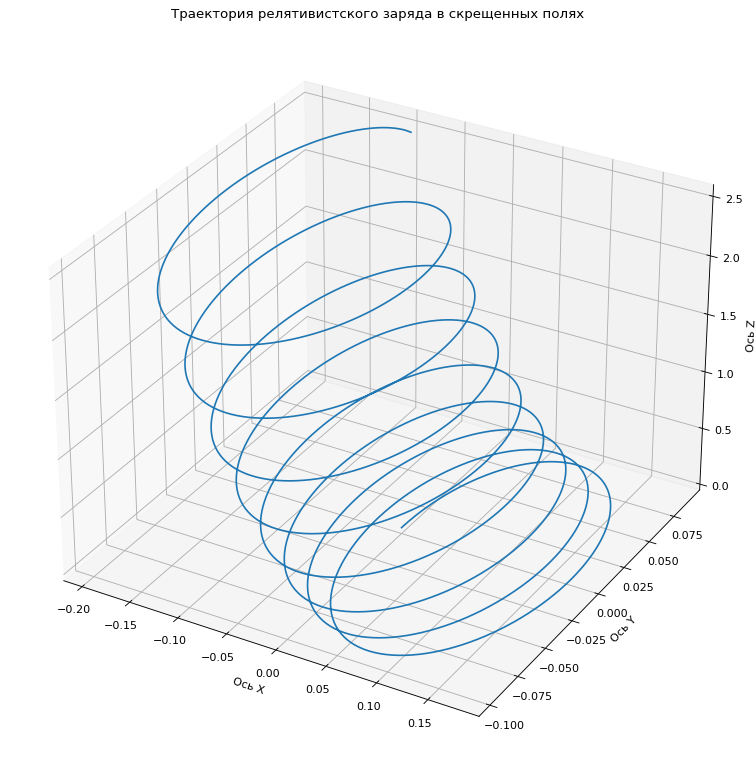

In [26]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
global B, E
B = [0, 0, 1] # напряженность магнитного поля
E = [0, -0.02, 0.01]

def RelativisticEC(t, z):
    x, vx, y, vy, z, vz = z
    Bx, By, Bz = B
    Ex, Ey, Ez = E
    
    Fx = 2 * np.pi * Ex + 2 * np.pi * (vy * Bz - vz * By)
    Fy = 2 * np.pi * Ey + 2 * np.pi * (vz * Bx - vx * Bz)
    Fz = 2 * np.pi * Ez + 2 * np.pi * (vx * By - vy * Bx)
    
    dxdt = vx
    dvxdt = (Fx - vx * (Fx * vx + Fy * vy + Fz * vz)) * (1 - (vx**2 + vy**2 + vz**2))**0.5
    dydt = vy
    dvydt = (Fy - vy * (Fx * vx + Fy * vy + Fz * vz)) * (1 - (vx**2 + vy**2 + vz**2))**0.5
    dzdt = vz
    dvzdt = (Fz - vz * (Fx * vx + Fy * vy + Fz * vz)) * (1 - (vx**2 + vy**2 + vz**2))**0.5

    return [dxdt, dvxdt, dydt, dvydt, dzdt, dvzdt]

x0 = 0
y0 = 0
z0 = 0
vx0 = 0
vy0 = 0.5
vz0 = 0
R0 = [x0, vx0, y0, vy0, z0, vz0]
T = [0, 10]

solve = solve_ivp(RelativisticEC, T, R0, max_step = 10/1024)

tf = solve.t 
R = solve.y

fig = plt.figure(figsize=(12, 12), dpi = 80)
ax = fig.add_subplot(projection = '3d')
ax.plot(R[0,:], R[2,:], R[4,:])

ax.set_title('Траектория релятивистского заряда в скрещенных полях')
ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_zlabel('Ось Z')

### Моделирование движения электрических зарядов в неоднородном магнитном поле 

Задача об описании движения электрических зарядов (в частности, вычислении
траектории движения) в постоянном неоднородном магнитном поле относится к числу
классических задач. Интерес к ней стимулировался в первую очередь активными
исследованиями в области управляемого термоядерного синтеза, где требовалось
найти ответ на вопрос о возможности удержания частиц в магнитных ловушках,
имеющих различные конфигурации магнитных полей. Кроме того, данная задача
возникает в космической астрофизике при объяснении причины существования
радиационных поясов у космических тел, обладающих магнитным полем. Для
однозначного описания траектории движения нерелятивистского электрического
заряда q в постоянном, неоднородном магнитном поле напряженностью
$\vec{H}(\vec{r})$ необходимо при заданных начальных условиях ($\vec{r}(0)$,
$\vec{v}(0)$) решить систему уравнений движения, которая в системе СГСЭq
записывается в виде

$$
\begin{matrix}
\dot{\vec{r}} = \vec{v}\\ 
\ddot{\vec{r}} = \frac{q}{mc}[\vec{v} \times \vec{H}(\vec{r})]
\end{matrix}
(1.66)
$$

Один из подходов к решению данной задачи основан на том, что слабая
неоднородность магнитного поля $\vec{m}$ порождает мало изменяющиеся адиабатические
инварианты, количество которых совпадает с числом степеней свободы исследуемой
системы. Для рассматриваемой задачи существование адиабатических инвариантов
обусловлено каждым из перечисленных выше движений. Вопрос о сохранении
адиабатических инвариантов наиболее подробно рассматривался для открытых
магнитных ловушек: в получено экспериментальное подтверждение сохранения
адиабатического инварианта, связанного с вращением заряда по ларморовской
окружности; в доказано вечное сохранение данного адиабатического инварианта
в идеальной осесимметричной ловушке с двумерным движением зарядов; в
исследовано изменение инвариантов, обусловленное взаимодействием трех степеней
свободы. Наиболее часто в качестве адиабатических инвариантов в рассматриваемой
задаче используются:

1. инвариант, обусловленный движением заряда по усредненной ларморовской окружности — магнитный момент:

$$I_1 = \pi\rho^2\frac{H}{2\pi}\frac{q^2}{mc^2}=\frac{mv^2}{2H}$$

2. инвариант, связанный с продольными колебаниями заряда из-за отражения от
магнитных зеркал ловушки:

$$I_2 = \frac{1}{2\pi}\oint \sqrt{E-\mu H}dl$$

где E — полная энергия частицы: $E = \frac{mv^2_{\perp}}{2}+\frac{mv^2_{\parallel}}{2}$


Интеграл вычисляется вдоль траектории движения заряда. Модель слабо
неоднородного поля принято также использовать для объяснения движения заряженных
частиц, захваченных магнитосферой Земли. При этом вопрос об адекватности данной
модели либо не обсуждается, либо приводится оценка параметра для протонов и
электронов с энергией 10 Мэв, находящихся в магнитном поле напряженностью 0, 3
э.

В связи с этим представляется естественным находить и анализировать численное
решение.

В данном разделе мы описываем пакет программ, позволяющий исследовать
особенности движения электрических зарядов в поле магнитного диполя. Выбор
источника магнитного поля обусловлен тем, что магнитное поле Земли по своей
геометрии оказывается близким к полю магнитного диполя, наклоненного под углом
$11,5^{\circ}$ к оси вращения Земли. Центр магнитного диполя смещен
приблизительно на 400 км относительно центра Земли. В связи с тем, что данное
расстояние оказывается значительно меньше радиуса Земли ($6,4 \cdot 10^3$ км),
далее в математической модели указанным смещением можно пренебречь и считать,
что магнитный диполь находится в начале прямоугольной декартовой системы
координат, ось OZ которой направлена вдоль оси вращения Земли.

Выбрав в качестве единиц измерения времени 
$T_0 = \frac{2\pi mc}/{|q| |\vec{H}_0|}$ — период движения заряда по ларморовской окружности в магнитном поле в плоскости, перпендикулярной вектору напряженности $\vec{H}_0$, и используя ранее введенные безразмерные переменные, можно записать систему уравнений движения (1.66), состоящую из 6 уравнений, в следующем виде:

$$
\begin{matrix}
\dot{\vec{r}} = \vec{v}\\ 
\ddot{\vec{r}} = 2\pi [\vec{v} \times \vec{H}(\vec{r})]
\end{matrix}
(1.76)
$$

где безразмерные начальные условия вычисляются по следующим выражениям:
$\vec{\tilde{R}}_0 = \frac{\vec{R}_0}{|\vec{R}_0|}$, 
$\vec{\tilde{v}}_0 = \frac{\vec{v}_0}{|\vec{R}_0|/T_0}=\vec{v}_0 \frac{2\pi mc}{|q| |\vec{H}_0| |\vec{R}_0|} $

Составляющие вектора напряженности магнитного поля диполя вдоль координатных осей

$$
\vec{H} = \left\{\begin{matrix}
Hx=\frac{3\cdot M\cdot r^T\cdot r_x}{\sqrt{(r\cdot r^T)^5}}-\frac{M_x}{\sqrt{(r\cdot r^T)^3}}\\
Hy=\frac{3\cdot M\cdot r^T\cdot r_y} {\sqrt{(r\cdot r^T)^5}}-\frac{M_y}{\sqrt{(r\cdot r^T)^3}}\\
Hz=\frac{3\cdot M \cdot  r^T\cdot r_z} {\sqrt{(r\cdot r^T)^5}}-\frac{M_z}{\sqrt{(r\cdot r^T)^3}}
\end{matrix}\right.
$$

вектор магнитного диполя $\vec{m}$ наклонен под углом $11,5^{\circ}$ к оси OZ

$$
\vec{m} = \left\{\begin{matrix}
m_x = 0\\
m_y = \sin(\frac{11.5 \pi }{180})\\
m_z = \cos(\frac{11.5 \pi }{180})
\end{matrix}\right.
$$


#### Задание. Написать функцию решения уравнения (1.76)

In [23]:
import numpy as np
def f(T , z):
        """
            Функция, описывающая правую часть СДУ в форме Коши
            X=y(1),dx/dt=y(2),y=y(3)
        """
        r = np.array([z[0] , z[2] , z[4]])
          
        vx , vy , vz = z[1] , z[3] , z[5]
        
        Hx = 3 * np.matmul(M , np.transpose(r)) * r[0] / np.matmul(r , np.transpose(r)) ** 2.5 - M[0] / np.matmul(r , np.transpose(r)) ** 1.5
        Hy = 3 * np.matmul(M , np.transpose(r)) * r[1] / np.matmul(r , np.transpose(r)) ** 2.5 - M[1] / np.matmul(r , np.transpose(r)) ** 1.5
        Hz = 3 * np.matmul(M , np.transpose(r)) * r[2] / np.matmul(r , np.transpose(r)) ** 2.5 - M[2] / np.matmul(r , np.transpose(r)) ** 1.5
    
        f = [1 , 0 , 0 , V0 , 0 , 0]
        
        f[0] = vx
        f[1] = 2 * np.pi * (vy * Hz - vz * Hy)
        f[2] = vy
        f[3] = 2 * np.pi * (vz * Hx - vx * Hz)
        f[4] = vz
        f[5] = 2 * np.pi * (vx * Hy - vy * Hx)
        
        return f

In [ ]:
# код

#### Задание. Смоделировать движение заряженной частицы в магнитном поле диполя
Постройте:
1. Траекторию движения заряда
2. Зависимость разности между начальным и текущими значениями кинетической энергии заряда от времени; 
3. Зависимость магнитного момента заряда от времени; 
4. Зависимость коэффициента неоднородности поля от времени;
5. Разность модулей радиусов-векторов зарядов, находившихся в начальный момент времени в близких точках.
1. Зависимость модуля радиуса-вектора от времени; 
7. Зависимость скорости изменения модуля радиуса-вектора от времени; 3) спектр зависимости модуля радиуса-вектора от времени; 
8. Зависимость разности между начальным и текущими значениями кинетической энергии заряда от времени; 
9. Зависимость магнитного момента заряда от времени; 
10. Зависимость коэффициента неоднородности поля от времени; 
11. Разность модулей радиусов-векторов зарядов, находившихся в начальный момент времени в близких точках.

In [ ]:
import numpy as np
global M # M - Магнитный момент диполя
V0 = 1.55 # начальная скорость
M = [0 , np.sin(11.5 * np.pi / 180) , np.cos(11.5 * np.pi / 180)]

state0 = [1 , 0 , 0 , V0 , 0 , 0]
T = [0 , 15]

solve = solve_ivp(f , T , state0 , max_step = 0.05)

t = solve.t 
Y = solve.y

fig = plt.figure(figsize = (18 , 12) , dpi = 80)

#1
axis1 = fig.add_subplot(221 , projection = '3d')
axis1.plot(Y[0] , Y[2] , Y[4])

axis1.set_title('Траектория двидения заряда')
axis1.set_xlabel('X')
axis1.set_ylabel('Y')
axis1.set_zlabel('Z')

#2
V1 = (Y[1] ** 2 + Y[3] ** 2 + Y[5] ** 2) ** 0.5
V0 = V1[0]
dE = (V0 - V1) / V0 * 100

ax2 = fig.add_subplot(222)
ax2.plot(t , dE)
ax2.set_title('Зависимость dE от времени t')
ax2.set_xlabel('t')
ax2.set_ylabel('dE')
ax2.grid()

#3
R = (Y[0] ** 2 + Y[2] ** 2 + Y[4] ** 2) ** 0.5
Hx = (3 * (Y[0] * M[0] + Y[2] * M[1] + Y[4] * M[2]) * Y[0]) / R ** 5 - M[0] / R ** 3
Hy = (3 * (Y[0] * M[0] + Y[2] * M[1] + Y[4] * M[2]) * Y[2]) / R ** 5 - M[1] / R ** 3
Hz = (3 * (Y[0] * M[0] + Y[2] * M[1] + Y[4] * M[2]) * Y[4]) / R ** 5 - M[2] / R ** 3
H = (Hx ** 2 + Hy ** 2 + Hz ** 2) ** 0.5
HV = Hx * Y[1] + Hy * Y[3] + Hz * Y[5]
V2 = V1 ** 2 - (HV / H) ** 2
I = V2 / H

ax3 = fig.add_subplot(223)
ax3.plot(t , I)
ax3.set_title('Зависимость магнитного момента заряда от времени t')
ax3.set_xlabel('t')
ax3.set_ylabel('I')
ax3.grid()

#4
x1 = Y[0] - 10 ** (-5)
y1 = Y[2] - 10 ** (-5)
z1 = Y[4] - 10 ** (-5)
dHx = (3 * (x1 * M[0] + Y[2] * M[1] + Y[4] * M[2]) * x1) / (x1 ** 2 + Y[2] ** 2 + Y[4] ** 2) ** 2.5 - M[0] / (x1 ** 2 + Y[2] ** 2 + Y[4] ** 2) ** 1.5
dHy = (3 * (Y[0] * M[0] + y1 * M[1] + Y[4] * M[2]) * y1) / (Y[0] ** 2 + y1 ** 2 + Y[4] ** 2) ** 2.5 - M[1] / (Y[0] ** 2 + y1 ** 2 + Y[4] ** 2) ** 1.5
dHz = (3 * (Y[0] * M[0] + Y[2] * M[1] + z1 * M[2]) * z1) / (Y[0] ** 2 + Y[2] ** 2 + z1 ** 2) ** 2.5 - M[2] / (Y[0] ** 2 + Y[2] ** 2 + z1 ** 2) ** 1.5
H1 = (dHx ** 2 + Hy ** 2 + Hz ** 2) ** 0.5
H2 = (Hx ** 2 + dHy ** 2 + Hz ** 2) ** 0.5
H3 = (Hx ** 2 + Hy ** 2 + dHz ** 2) ** 0.5
G1 = (H - H1) / 10 ** (-5)
G2 = (H - H2) / 10 ** (-5)
G3 = (H - H3) / 10 ** (-5)
G = (G1 ** 2 + G2 ** 2 + G3 ** 2) ** 0.5
K = ((V2 ** 0.5) * G) / (2 * np.pi * H)

ax4 = fig.add_subplot(224)
ax4.plot(t , K)
ax4.set_title('Зависимость коэффициента неоднородности поля от времени t')
ax4.set_xlabel('t')
ax4.set_ylabel('K')
ax4.grid()

fig = plt.figure(figsize = (18 , 12) , dpi = 80)

#5
state01 = [1 + 10 ** (-4) , 0 , 0 , V0 , 0 , 0]
solve1 = solve_ivp(f , T , state01 , max_step = 0.05)
t1 = solve1.t
Y1 = solve1.y
x2 , y2 , z2 = Y1[0] , Y1[2] , Y1[4]

if len(t1) >= len(t):
    time = t
    R1 = np.empty(len(R))
    for i in range(len(R)):
        R1[i] = (x2[i] ** 2 + y2[i] ** 2 + z2[i] ** 2) ** 0.5
    dR = abs(R) - abs(R1)
else:
    time = t1
    R1 = (x2 ** 2 + y2 ** 2 + z2 ** 2) ** 0.5
    R2 = np.empty(len(R1))
    for i in range(len(R1)):
        R2[i] = R[i]
    dR = abs(R2) - abs(R1)

ax5 = fig.add_subplot(221)
ax5.plot(time , dR)
ax5.set_title('Разность модулей радиусов-векторов зарядов, находившихся в начальный момент времени в близких точках')
ax5.set_xlabel('t')
ax5.set_ylabel('dR')
ax5.grid()

#6
ax6 = fig.add_subplot(222)
ax6.plot(t , R)
ax6.set_title('Зависимость модуля радиуса-вектора от времени t')
ax6.set_xlabel('t')
ax6.set_ylabel('R')
ax6.grid()

#7
V = np.diff(R) / (max(t) / len(t))
V = np.append(V , V[-1])

ax7 = fig.add_subplot(223)
ax7.plot(t , V)
ax7.set_title('Зависимость скорости изменения модуля радиуса-вектора от времени t')
ax7.set_xlabel('t')
ax7.set_ylabel('V')
ax7.grid()

#8
df = 15 / len(R)
f = np.arange(0 , 15 + 0.00001 , df)
a = abs(np.fft.fft(R))
s = a / max(a)
s = np.append(s , s[-1])

ax8 = fig.add_subplot(224)
ax8.plot(f , s)
ax8.set_title('Cпектр зависимости модуля радиуса-вектора от времени')
ax8.set_xlabel('t')
ax8.set_ylabel('R')
ax8.grid()

In [ ]:
# код

#### Задание. Измените параметры моделирования, посмотрите, что получится при построение зависимостей из прошлого задания


In [1]:
import numpy as np
global M # M - Магнитный момент диполя
V0 = 10.0 # начальная скорость
M = [0 , np.sin(11.5 * np.pi / 180) , np.cos(11.5 * np.pi / 180)]

state0 = [1 , 0 , 0 , V0 , 0 , 0]
T = [0 , 15]

solve = solve_ivp(f , T , state0 , max_step = 0.05)

t = solve.t 
Y = solve.y

fig = plt.figure(figsize = (18 , 12) , dpi = 80)

#1
ax = fig.add_subplot(221 , projection = '3d')
ax.plot(Y[0] , Y[2] , Y[4])

ax.set_title('Траектория двидения заряда')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#2
V1 = (Y[1] ** 2 + Y[3] ** 2 + Y[5] ** 2) ** 0.5
V0 = V1[0]
dE = (V0 - V1) / V0 * 100

ax2 = fig.add_subplot(222)
ax2.plot(t , dE)
ax2.set_title('Зависимость dE от времени t')
ax2.set_xlabel('t')
ax2.set_ylabel('dE')
ax2.grid()

#3
R = (Y[0] ** 2 + Y[2] ** 2 + Y[4] ** 2) ** 0.5
Hx = (3 * (Y[0] * M[0] + Y[2] * M[1] + Y[4] * M[2]) * Y[0]) / R ** 5 - M[0] / R ** 3
Hy = (3 * (Y[0] * M[0] + Y[2] * M[1] + Y[4] * M[2]) * Y[2]) / R ** 5 - M[1] / R ** 3
Hz = (3 * (Y[0] * M[0] + Y[2] * M[1] + Y[4] * M[2]) * Y[4]) / R ** 5 - M[2] / R ** 3
H = (Hx ** 2 + Hy ** 2 + Hz ** 2) ** 0.5
HV = Hx * Y[1] + Hy * Y[3] + Hz * Y[5]
V2 = V1 ** 2 - (HV / H) ** 2
I = V2 / H

ax3 = fig.add_subplot(223)
ax3.plot(t , I)
ax3.set_title('Зависимость магнитного момента заряда от времени t')
ax3.set_xlabel('t')
ax3.set_ylabel('I')
ax3.grid()

#4
x1 = Y[0] - 10 ** (-5)
y1 = Y[2] - 10 ** (-5)
z1 = Y[4] - 10 ** (-5)
dHx = (3 * (x1 * M[0] + Y[2] * M[1] + Y[4] * M[2]) * x1) / (x1 ** 2 + Y[2] ** 2 + Y[4] ** 2) ** 2.5 - M[0] / (x1 ** 2 + Y[2] ** 2 + Y[4] ** 2) ** 1.5
dHy = (3 * (Y[0] * M[0] + y1 * M[1] + Y[4] * M[2]) * y1) / (Y[0] ** 2 + y1 ** 2 + Y[4] ** 2) ** 2.5 - M[1] / (Y[0] ** 2 + y1 ** 2 + Y[4] ** 2) ** 1.5
dHz = (3 * (Y[0] * M[0] + Y[2] * M[1] + z1 * M[2]) * z1) / (Y[0] ** 2 + Y[2] ** 2 + z1 ** 2) ** 2.5 - M[2] / (Y[0] ** 2 + Y[2] ** 2 + z1 ** 2) ** 1.5
H1 = (dHx ** 2 + Hy ** 2 + Hz ** 2) ** 0.5
H2 = (Hx ** 2 + dHy ** 2 + Hz ** 2) ** 0.5
H3 = (Hx ** 2 + Hy ** 2 + dHz ** 2) ** 0.5
G1 = (H - H1) / 10 ** (-5)
G2 = (H - H2) / 10 ** (-5)
G3 = (H - H3) / 10 ** (-5)
G = (G1 ** 2 + G2 ** 2 + G3 ** 2) ** 0.5
K = ((V2 ** 0.5) * G) / (2 * np.pi * H)

ax4 = fig.add_subplot(224)
ax4.plot(t , K)
ax4.set_title('Зависимость коэффициента неоднородности поля от времени t')
ax4.set_xlabel('t')
ax4.set_ylabel('K')
ax4.grid()

fig = plt.figure(figsize = (18 , 12) , dpi = 80)

#5
state01 = [1 + 10 ** (-4) , 0 , 0 , V0 , 0 , 0]
solve1 = solve_ivp(f , T , state01 , max_step = 0.05)
t1 = solve1.t
Y1 = solve1.y
x2 , y2 , z2 = Y1[0] , Y1[2] , Y1[4]

if len(t1) >= len(t):
    time = t
    R1 = np.empty(len(R))
    for i in range(len(R)):
        R1[i] = (x2[i] ** 2 + y2[i] ** 2 + z2[i] ** 2) ** 0.5
    dR = abs(R) - abs(R1)
else:
    time = t1
    R1 = (x2 ** 2 + y2 ** 2 + z2 ** 2) ** 0.5
    R2 = np.empty(len(R1))
    for i in range(len(R1)):
        R2[i] = R[i]
    dR = abs(R2) - abs(R1)

ax5 = fig.add_subplot(221)
ax5.plot(time , dR)
ax5.set_title('Разность модулей радиусов-векторов зарядов, находившихся в начальный момент времени в близких точках')
ax5.set_xlabel('t')
ax5.set_ylabel('dR')
ax5.grid()

#6
ax6 = fig.add_subplot(222)
ax6.plot(t , R)
ax6.set_title('Зависимость модуля радиуса-вектора от времени t')
ax6.set_xlabel('t')
ax6.set_ylabel('R')
ax6.grid()

#7
V = np.diff(R) / (max(t) / len(t))
V = np.append(V , V[-1])

ax7 = fig.add_subplot(223)
ax7.plot(t , V)
ax7.set_title('Зависимость скорости изменения модуля радиуса-вектора от времени t')
ax7.set_xlabel('t')
ax7.set_ylabel('V')
ax7.grid()

#8
df = 15 / len(R)
f = np.arange(0 , 15 + 0.00001 , df)
a = abs(np.fft.fft(R))
s = a / max(a)
s = np.append(s , s[-1])

ax8 = fig.add_subplot(224)
ax8.plot(f , s)
ax8.set_title('Cпектр зависимости модуля радиуса-вектора от времени')
ax8.set_xlabel('t')
ax8.set_ylabel('R')
ax8.grid()

NameError: name 'np' is not defined

### Вывод

<!-- Вывод -->
Изменение начальной скорости заряда привело к тому, что траектория движения заряда поменялась, как и зависимость разности между начальным и текущими значениями кинетической энергии заряда от времени и так далее. Вследствие проделанных действий,можно заключить, что изменение параметров делает движение заряда более хаотичным.

### Случайные блуждания

Впервые задача о случайных блужданиях была сформулирована в 1906 г. Пирсоном. В
первоначальной формулировке требовалось определить, на каком расстоянии от
начальной точки будет находиться пешеход, сделав N шагов равной длины в
произвольных направлениях. Отметим, что со времени постановки задачи в такой
формулировке модели случайного блуждания получили широкое распространение в
физике, биологии, химии, общественных науках. Например, для описания диффузии
молекул газа, движения коллоидных взвесей в жидкости, моделирования длинных
полимерных цепочек, решения ряда задач квантовой механики и др. В этой и
последующих главах рассматриваются модели, для реализации которых используется
метод случайных блужданий.

Рассмотрим идеализированную одномерную задачу о движении пешехода, который в
момент времени $t = 0$ находится в точке $x = 0$.

Будем считать, что все шаги имеют одинаковую длину $l$, а направление каждого
следующего шага не зависит от направления предыдущего шага. Предположим, что на
каждом шаге по времени пешеход делает шаг вправо с вероятностью p или шаг влево
с вероятностью $q = 1 − p$. Обозначим общее количество шагов, сделанных
пешеходом, вправо $n+$, влево $n−$, тогда полное число шагов равно N = n+ +n−.
Полное смещение пешехода после N шагов равно $x = (n+ −n−)l$, где $−Nl ≤ x ≤
Nl$. Зависимость $x_i$ , $i = 0, 1, . . . , N$, называют реализацией случайного
процесса. Совокупность зависимостей xi , имеющих одинаковую длину и начинающихся
из одной точки, называют ансамблем реализаций. Необходимо определить вероятность
$P_N(x)$ того, что после $N$ шагов пешеход окажется на расстоянии $x$ от начала
отсчета. Знание вероятности позволяет вычислить среднее смещение $⟨x_N⟩$.

В методе полного перебора количество и вероятность всех блужданий для заданных
$N$ и $x$ вычисляются в явном виде.

В методе Монте-Карло в отличие от метода полного перебора всех N-шаговых
блужданий проводится генерация достаточно большого количества реализаций
(ансамбля реализаций) ($NTrial$ — число реализаций в ансамбле) с искомым законом
распределения. При этом длина отдельных реализаций NStep должна быть такой,
чтобы обеспечить принадлежность каждой реализации выбранных блужданий множеству,
содержащему все допустимые блуждания. (Обычно длина реализации варьируется от
100 до 1000 шагов.) Затем из каждой реализации выбираются значения смещения
пешехода на последнем шаге. Это позволяет сформировать выборку длиной $NTrial$,
статистические свойства которой оказываются близкими к свойствам
последовательности, получаемой методом прямого перебора.

#### Задание. Реализовать функцию метода Монте-Карло

In [3]:
def Walk(NStep: int , NTrial: int , p: float):
    """Функция, реализующая метод Монте-Карло
    Args:
        NStep (int): длина единичной реализации
        NTrial (int): длина случайной последовательности
        p (float): вероятность перехода вправо
    """
    X = np.empty(NTrial)
    for i in range (NTrial):
        x = 0
        for j in range(NStep):
            if p <= np.random.rand():
                x += 1
            else:
                x -= 1
        X[i] = x
        
    return X

#### Задание. Реализовать отображение случайной последовательности, полученной методом Монте-Карло. Построить последовательность и гистограмму

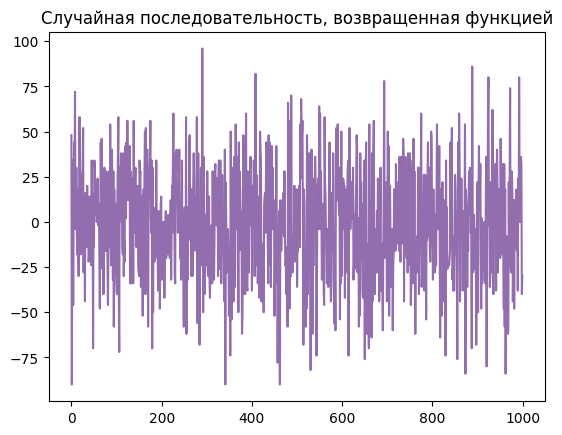

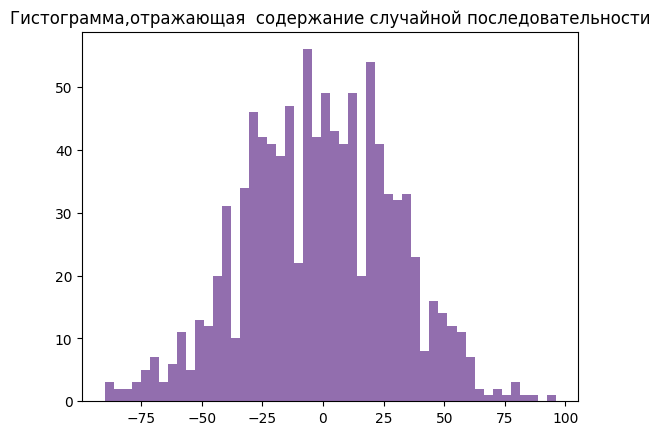

In [9]:
NStep = 1000
NTrial = 1000
p = 0.5

M = Walk(NStep , NTrial , p)
nTrial = np.arange(NTrial)

plt.plot(nTrial , M, color = "#926EAE")
plt.title('Случайная последовательность, возвращенная функцией')
plt.show()

plt.hist(M , 50 ,color = "#926EAE")
plt.title('Гистограмма,отражающая  содержание случайной последовательности')
plt.show()

Анализ гистограммы, позволяет высказать гипотезу о том, что значения случайной последовательности распределены по нормальному
закону.
Для проверки данной гипотезы будем использовать следующий алгоритм:
1. Вычислить среднее отклонение пешехода от начальной точки $⟨xN ⟩$.
2. Вычислить среднеквадратичное отклонение пешехода от начальной точки $\sqrt{\Delta x^2_N}$.
3. Вычислить теоретические частоты попадания значений случайной последовательности в заданные интервалы в предположении о нормальном законе распределения членов случайной последовательности:

$$Freq_{k1} = \int_{X_{k}}^{X_{k+1}}NTrial \cdot normpdf(x, X0, \sigma)$$

где

$$normpdf(x, X0, \sigma) = \frac{1}{\sqrt{2 \pi \sigma}}e^{−(x−X0)^2/2\sigma^2}$$

4. Вычислить для случайной последовательности критерий $\chi^2$
:
$$\chi^2 = \sum_{i=0}^{N_i-1}
\frac{(Yi − Freq_i)^2}{Freq_i}$$.
5. Вычислить теоретическое значение критерия $\chi^2$:
$$qchisq (0,995, rows (Y ) − 1 − 3)$$
1. Сравнить полученные критерии $\chi^2$.


#### Задание. Реализовать описанный выше алгоритм и вывести значение $\chi^2$

In [8]:
from scipy.stats.distributions import chi2

def normpdf(x , x0 , sigma):
    return 1 / ((2 * np.pi) ** 0.5 * sigma) * np.exp( - (x - x0) ** 2 / (2 * sigma ** 2))

Ni = 50
Nf = 20
k = np.arange(Ni)
dx = (max(M) - min(M)) / Ni
x = min(M) + dx * k
s = np.histogram(M , x)
x0 = np.mean(M)
sigma = np.std(M)
f = np.empty(Ni - 1)
k = np.arange(Nf)

for i in range(Ni - 1):
    X1 = x[i]
    X2 = x[i + 1]
    dx = (X2 - X1) / Nf
    x1 = X1 + dx * k
    y1 = NTrial * normpdf(x1 , x0 , sigma)
    f[i] = np.trapz(y1 , x1)

f1 = 0
for i in range(Ni - 1):
    f1 += (s[0][i] - f[i]) ** 2 / f[i]
print(f'Критерий созданной функции = {f1}')
print(f'Граничное значение критерия = {chi2.ppf(0.995 , df = Ni - 1 - 3)}')

Критерий созданной функции = 41.68413623739539
Граничное значение критерия = 74.4365353721017


Сравнение критерия $\chi^2$
(равного 68,3450), полученного при данном прогоне программы для случайной последовательности, и граничного
значения критерия $\chi^2$
(равного 74,4365), определенного теоретически, позволяет сделать вывод об отсутствии оснований для опровержения гипотезы о нормальном законе
распределения рассматриваемой последовательности случайных чисел.

Отметим, что для случайной последовательности данных можно использовать не
только, в известной мере, интегральную характеристику — гистограмму, но и вычислять точные значения функции распределения. Для этого, как очевидно, следует подсчитать количество посещений пешеходом каждой точки отрезка 
$[X_{min}, X_{max}]$ и
отнести их к полному числу шагов, сделанных пешеходом. Для вычисления функции
распределения необходимо создать функцию, возвращающую значения вероятности нахождения пешехода в данной точке

#### Задание. Реализовать функцию построения функции распределения. Функция возвращает значения вероятности нахождения пешехода в данной точке.

In [11]:
def DistrR(M):
    chance = np.zeros(int(max(M) - min(M)) * 2)
    for i in range(len(M)):
        chance[int(M[i] + len(chance) / 2)] += 1
    chance = chance / NStep
    
    return chance

#### Задание. Применить полученную функцию для получения функции распределения

Text(0.5, 1.0, 'Функция распределения')

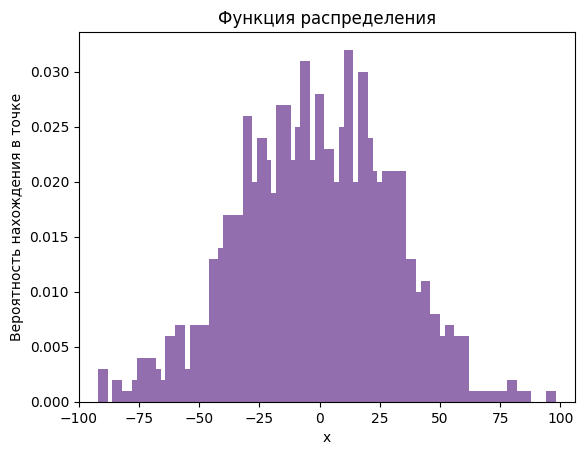

In [12]:
M1 = DistrR(M)
x = np.arange(- len(M1) / 2 , len(M1) / 2)

plt.bar(x , M1 , 4, color = "#926EAE")
plt.xlim([min(M) - 10 , max(M) + 10])
plt.xlabel('x')
plt.ylabel('Вероятность нахождения в точке')
plt.title('Функция распределения')




### Метод случайных блужданий на плоскости

Рассмотрим обобщения метода одномерных случайных блужданий для систем большей
размерности. Их обсуждение совершенно естественно начать с рассмотрения
случайных блужданий в двумерной плоскости. Статический характер задачи
случайного блуждания означает, что следует рассматривать либо большое количество
случайных блужданий одного пешехода, либо большое число пешеходов, движущихся
одновременно. Далее нами используется второй подход.

Рассмотрим группу пешеходов, расположенных в момент времени $t = 0$, случайным образом в круге единичного радиуса с центром в начале координат. Будем считать, что на каждом шаге по времени каждый пешеход движется случайным образом
равновероятно в одном из четырех направлений: в положительном направлении оси
OX, в отрицательном направлении оси OX, в положительном направлении оси OY, в
отрицательном направлении оси OY. При этом направление движения выбирается в
соответствии с методом Монте-Карло в зависимости от величины случайного числа и
заданного порогового значения.

#### Задание. Создать функцию возвращающую начальную конфигурацию системы

In [13]:
def Init2(NParticle , R):
    XY = np.empty([2 , NParticle])
    for i in range(NParticle):
        R0 = np.random.random() * R
        theta = 2 * np.pi * np.random.random()
        XY[0 , i] = R0 * np.cos(theta)
        XY[1 , i] = R0 * np.sin(theta)
    return XY

#### Задание. Создать функцию возвращающую мгновенные значения координат пешеходов

In [14]:
def Move(A , NParticle , NStep):
    z = np.empty([2 , NParticle , NStep])
    for i in range(NParticle):
        z[0 , i , 0] = A[0 , i]
        z[1 , i , 0] = A[1 , i]
        for j in range(NStep - 1):
            p = np.random.random()
            if p <= 0.25:
                z[0 , i , j + 1] = z[0 , i , j] + 1
                z[1 , i , j + 1] = z[1 , i , j]
            elif p > 0.25 and p <= 0.5:
                z[0 , i , j + 1] = z[0 , i , j] - 1
                z[1 , i , j + 1] = z[1 , i , j]
            elif p > 0.5 and p <= 0.75:
                z[0 , i , j + 1] = z[0 , i , j]
                z[1 , i , j + 1] = z[1 , i , j] - 1
            else:
                z[0 , i , j + 1] = z[0 , i , j]
                z[1 , i , j + 1] = z[1 , i , j] + 1
    return z

#### Задание. Применить функции

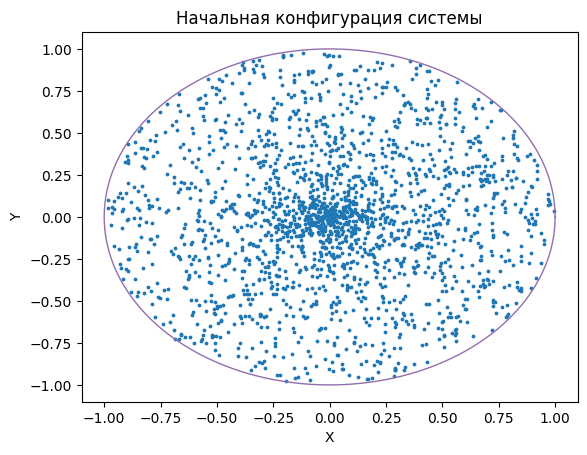

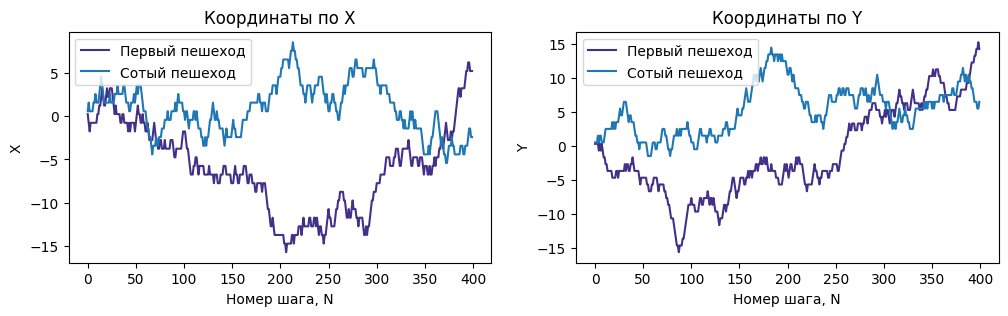

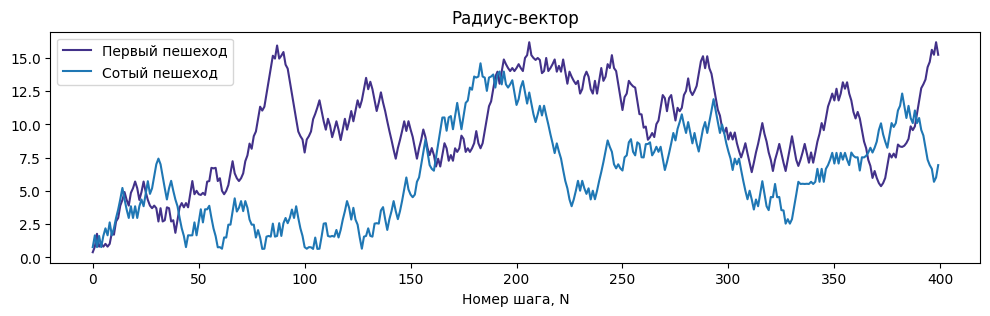

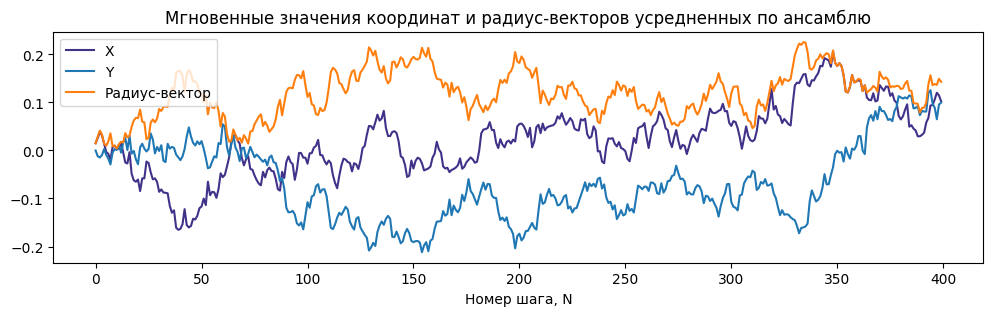

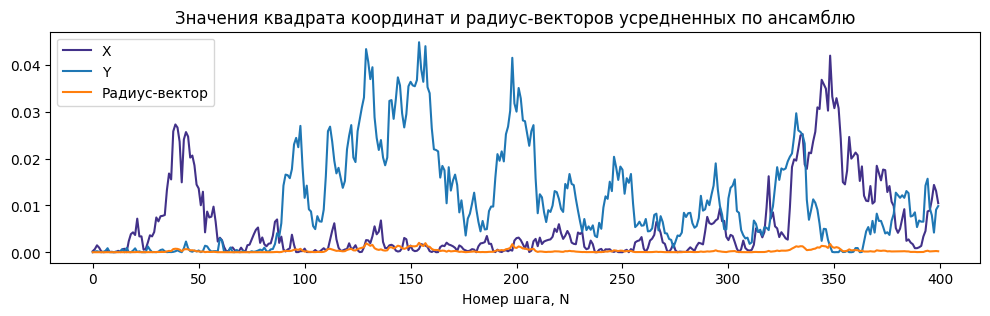

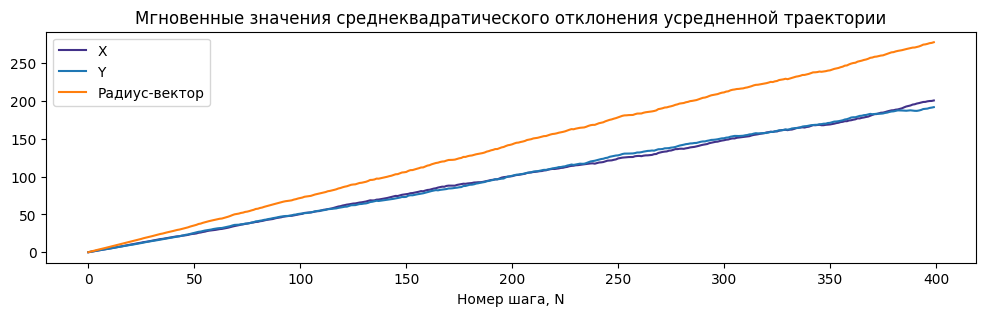

In [16]:
NParticle = 2000
NStep = 400
R = 1
A = Init2(NParticle , R)
Np = 2000

# Визуализация начальной конфигурации системы
i = np.arange(Np)
dphi = 2 * np.pi / Np
phi = dphi * i
x = np.cos(phi)
y = np.sin(phi)

plt.plot(x , y , c = '#926EAE' , linewidth = 1)
plt.scatter(A[0] , A[1] , s = 3)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Начальная конфигурация системы')

# Вычисление координат каждого пешехода в заданные моменты времени
Am = Move(A , NParticle , NStep)
X = np.arange(NStep)
R = (Am[0 , 0] ** 2 + Am[1 , 0] ** 2) ** 0.5
R100 = (Am[0 , 100] ** 2 + Am[1 , 100] ** 2) ** 0.5

# Визуализация мгновенных значений координат и радиусов векторов первого и сотого пешехода
fig = plt.figure(figsize = (12 , 3))

ax1 = fig.add_subplot(121)
ax1.plot(X , Am[0 , 0] , label = 'Первый пешеход' ,color = "#423189")
ax1.plot(X , Am[0 , 100] , label = 'Сотый пешеход')
ax1.set_ylabel('X')
ax1.set_xlabel('Номер шага, N')
ax1.set_title('Координаты по X')
ax1.legend(loc = 'upper left')

ax2 = fig.add_subplot(122)
ax2.plot(X , Am[1 , 0] , label = 'Первый пешеход',color = "#423189")
ax2.plot(X , Am[1 , 100] , label = 'Сотый пешеход')
ax2.set_ylabel('Y')
ax2.set_xlabel('Номер шага, N')
ax2.set_title('Координаты по Y')
ax2.legend(loc = 'upper left')

fig = plt.figure(figsize = (12 , 3))

ax3 = fig.add_subplot(111)
ax3.plot(X , R , label = 'Первый пешеход',color = "#423189")
ax3.plot(X , R100 , label = 'Сотый пешеход')
ax3.set_xlabel('Номер шага, N')
ax3.set_title('Радиус-вектор')
ax3.legend(loc = 'upper left')

# Вычисление усредненных по ансамблю пешеходов значений координат
Xmean = np.empty(NStep)
Ymean = np.empty(NStep)
for j in range(NStep):
    Xmean[j] = np.mean(Am[0 , : , j])
    Ymean[j] = np.mean(Am[1 , : , j])
Rmean = (Xmean ** 2 + Ymean ** 2) ** 0.5

# Визуализация мгновенных значений координат и радиусов векторов усредненных по ансамблю
fig = plt.figure(figsize = (12 , 3))

ax4 = fig.add_subplot(111)
ax4.plot(X , Xmean , label = 'X',color = "#423189")
ax4.plot(X , Ymean , label = 'Y')
ax4.plot(X , Rmean , label = 'Радиус-вектор')
ax4.set_xlabel('Номер шага, N')
ax4.set_title('Мгновенные значения координат и радиус-векторов усредненных по ансамблю')
ax4.legend(loc = 'upper left')
# Вычисление и визуализация координат и квадрата радиус вектора усредненных по ансамблю пешеходов
Xmean1 = np.empty(NStep)
Ymean1 = np.empty(NStep)
for j in range(NStep):
    Xmean1[j] = np.mean(Am[0 , : , j]) ** 2
    Ymean1[j] = np.mean(Am[1 , : , j]) ** 2
Rmean1 = (Xmean1 ** 2 + Ymean1 ** 2)

fig = plt.figure(figsize = (12 , 3))

ax5 = fig.add_subplot(111)
ax5.plot(X , Xmean1 , label = 'X',color = "#423189")
ax5.plot(X , Ymean1 , label = 'Y')
ax5.plot(X , Rmean1 , label = 'Радиус-вектор')
ax5.set_xlabel('Номер шага, N')
ax5.set_title('Значения квадрата координат и радиус-векторов усредненных по ансамблю')
ax5.legend(loc = 'upper left')

# Вычисление и визуализация мгновенных значений среднеквадратического отклонения усредненной траектории
Xsr = np.empty(NStep)
Ysr = np.empty(NStep)
for j in range(NStep):
    Xsr[j] = np.mean(Am[0 , : , j] ** 2) - np.mean(Am[0 , : , j]) ** 2
    Ysr[j] = np.mean(Am[1 , : , j] ** 2) - np.mean(Am[1 , : , j]) ** 2
Rsr = (Xsr ** 2 + Ysr ** 2) ** 0.5

fig = plt.figure(figsize = (12 , 3))

ax6 = fig.add_subplot(111)
ax6.plot(X , Xsr , label = 'X',color = "#423189")
ax6.plot(X , Ysr , label = 'Y',color = "#423189")
ax6.plot(X , Rsr , label = 'Радиус-вектор')
ax6.set_xlabel('Номер шага, N')
ax6.set_title('Мгновенные значения среднеквадратического отклонения усредненной траектории')
ax6.legend(loc = 'upper left')

Для описания рассеяния частицы на неподвижных рассеивающих центрах с анизотропным сечением рассеивания используют модель, в которой считается, что пешеход на N-м шаге с вероятностью p смещается в направлении перехода на $(N − 1)$-м шаге и с вероятностью $1 − p$ в противоположном направлении (персистентное случайное блуждание). Алгоритм моделирования персистентного случайного блуждания
методом Монте-Карло реализуется следующей последовательностью действий:
1. Задать длину случайной последовательности (число шагов пешехода) $NStep$ и
размер ансамбля случайных реализаций $NTrial$.
2. Задать начальную координату пешехода и направление первого шага.
3. Выбрать пороговое значение вероятности перехода $p$.
4. Сгенерировать случайное число q с равномерным законом распределения на интервале $[0, 1]$.
5. Если $q ≥ p$, осуществить переход в направлении, совпадающем с направлением
перехода на предыдущем шаге.
1. Если $q < p$, осуществить переход в направлении, противоположном направлению перехода на предыдущем шаге.
7. После выполнения заданного числа шагов $NStep$ вернуть пешехода в начальную
точку, иначе повторять п. 4–6, пока число шагов меньше NStep.
8. Сгенерировать новую случайную последовательность, выполняя п. 5–7.
9. Если число случайных последовательностей меньше $NTrial$, повторить п. 5–8.

#### Задание. Создать функцию, возвращающей мгновенные значения координат пешеходов на каждом шаге Монте-Карло.


In [17]:
def Walk2(NStep , NTrial , p , x0 , dx):
    """функция возвращает мгновенные значения координат пешеходов

    Args:
        NStep : число шагов Монте-Карло
        NTrial : число пешеходов
        p : пороговое значение вероятности перехода
        x0 : координата пешехода в t=0
        dx : направление смещения пешехода на первом шаге
    """
    y = np.empty([NTrial , NStep])
    for i in range(NTrial):
        y[i , 0] = x0
        x = x0
        d = dx
        K = 1
        for j in range(NStep - 1):
            if p < np.random.rand():
                d = - d
            x += d
            y[i , j + 1] = x
    return y

#### Задание. Рассчитать и смоделировать задачу

Text(0.5, 1.0, 'Мгновенные значения среднеквадратического отклонения')

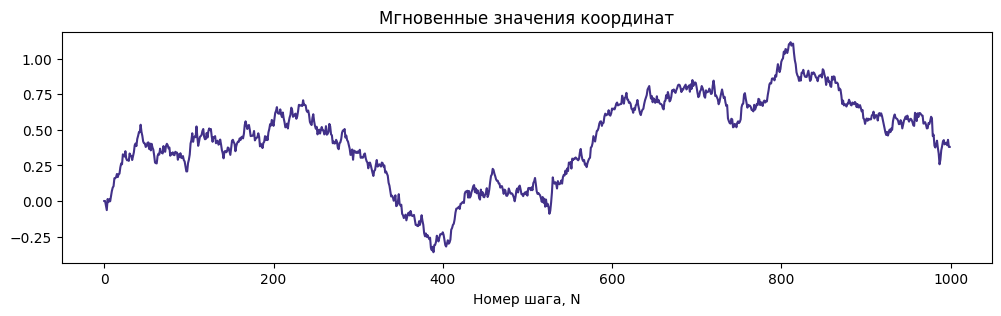

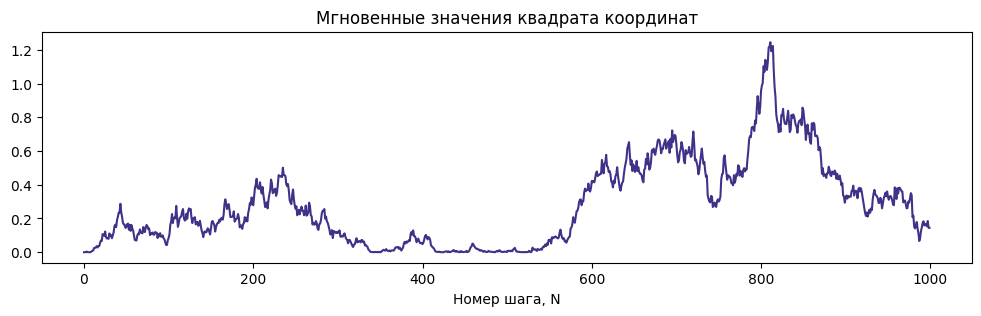

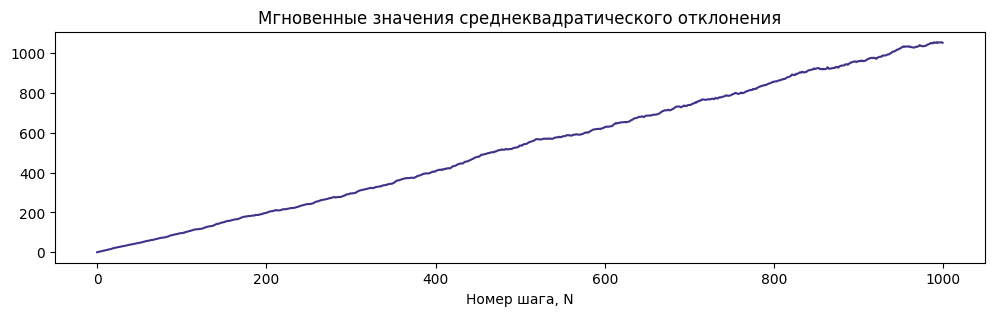

In [19]:
NStep = 1000
NTrial = 1000
p = 0.5
x0 = 0
dx = 1

# Вычисление случайной последовательности
M = Walk2(NStep , NTrial , p , x0 , dx)

# Вычисление мгновенных значений среднего по ансамблю пешеходов
X = np.arange(NStep)
m = np.empty(NStep , dtype = float)
for i in range(NStep):
    m[i] = np.mean(M[: , i])
    
fig = plt.figure(figsize = (12 , 3))

ax = fig.add_subplot(111)
ax.plot(X , m,color = "#423189")
ax.set_xlabel('Номер шага, N')
ax.set_title('Мгновенные значения координат')

# Вычисление мгновенных значений среднего по ансамблю пешеходов квадрата среднего
mm = np.empty(NStep , dtype = float)
for i in range(NStep):
    mm[i] = np.mean(M[: , i]) ** 2

fig = plt.figure(figsize = (12 , 3))

ax = fig.add_subplot(111)
ax.plot(X , mm,color = "#423189")
ax.set_xlabel('Номер шага, N')
ax.set_title('Мгновенные значения квадрата координат')

# Вычисление и визуализация мгновенных значений мСКО пешехода от начальной точки, усредненных по ансамблю\
mmm = np.empty(NStep , dtype = float)
for i in range(NStep):
    mmm[i] = np.mean(M[: , i] ** 2) - np.mean(M[: , i]) ** 2

fig = plt.figure(figsize = (12 , 3))

ax = fig.add_subplot(111)
ax.plot(X , mmm,color = "#423189")
ax.set_xlabel('Номер шага, N')
ax.set_title('Мгновенные значения среднеквадратического отклонения')

### Моделирование движения решеточного газа

В модели решеточного газа рассматривается случайное движение невзаимодействующих
друг с другом частиц (пешеходов) на двумерной или трехмерной решетках. Условие
отсутствия взаимодействия частиц означает невозможность попадания двух частиц в
один узел. (Данная модель используется в физике твердого тела, так как в твердых
телах (в первую очередь в металлах) диффузия обусловлена температурными
вакансиями, концентрация которых зависит от температуры.) Основной
характеристикой, представляющей интерес с физической точки зрения, в данной
задаче является коэффициент диффузии D. Метод Монте-Карло в данной задаче
реализуется в соответствии со следующим алгоритмом:
1. Задать числа узлов решетки $L$.
2. Задать число частиц $N$ ($N ≤ L^2$).
3. Задать начальное распределение частиц.
4. Перемещать частицы случайным образом в один из свободных соседних узлов.
(Если узел оказывается занятым, то частица остается в текущем узле.)

#### Задание. Создать функцию, возвращающую начальную конфигурацию системы

In [21]:
def InitL(L,NParticle):
    Site = np.zeros([L , L])
    x = np.empty(NParticle , dtype = int)
    y = np.empty(NParticle , dtype = int)
    i = 0
    while i < NParticle:
        xx = int(np.floor(L * np.random.rand()))
        yy = int(np.floor(L * np.random.rand()))
        if Site[xx , yy] == 0:
            Site[xx , yy] = 1
            x[i] = xx
            y[i] = yy
            i += 1
    return x , y , Site

#### Задание. Создать функцию, возвращающую мгновенные (на каждом шаге Монте-Карло) значения координат частиц системы.

In [22]:
def MoveL(L , NParticle , NTrial , x , y , Site):
    z = np.empty([NParticle , NTrial , 2], dtype = int)
    for i in range(NParticle):
        z[i , 0 , 0] = x[i]
        z[i , 0 , 1] = y[i]
        for j in range(NTrial - 1):
            p = np.random.rand()
            if p <= 0.25 and z[i , j , 0] < L - 1 and Site[z[i , j , 0] + 1 , z[i , j , 1]] == 0:
                z[i , j + 1 , 0] = z[i , j , 0] + 1
                z[i , j + 1 , 1] = z[i , j , 1]
            elif p > 0.25 and p <= 0.5 and z[i , j , 0] > 0 and Site[z[i , j , 0] - 1 , z[i , j , 1]] == 0:
                z[i , j + 1 , 0] = z[i , j , 0] - 1
                z[i , j + 1 , 1] = z[i , j , 1]
            elif p > 0.5 and p <= 0.75 and z[i , j , 1] > 0 and Site[z[i , j , 0] , z[i , j , 1] - 1] == 0:
                z[i , j + 1 , 0] = z[i , j , 0]
                z[i , j + 1 , 1] = z[i , j , 1] - 1
            elif p > 0.75 and z[i , j , 1] < L - 1 and Site[z[i , j , 0] , z[i , j , 1] + 1] == 0:
                z[i , j + 1 , 0] = z[i , j , 0]
                z[i , j + 1 , 1] = z[i , j , 1] + 1
            else:
                z[i , j + 1 , 0] = z[i , j , 0]
                z[i , j + 1 , 1] = z[i , j , 1]
    return z

#### Задание. Промоделируем с помощью функций 

Text(0.5, 1.0, 'Мгновенные значения СКО от равновесного положения усредненных по ансамблю')

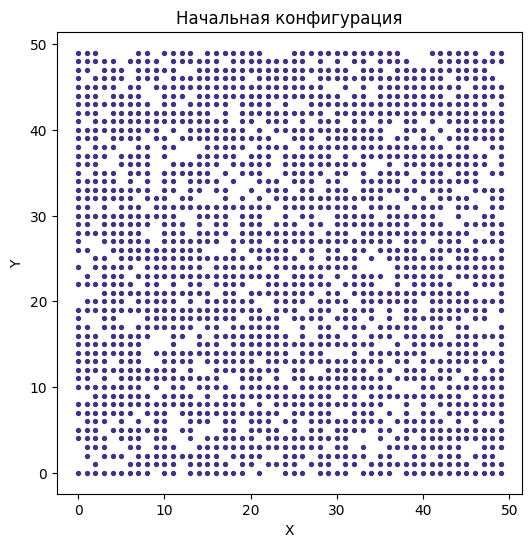

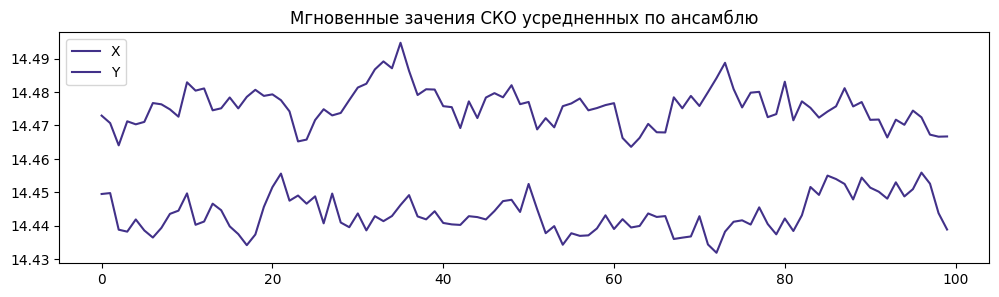

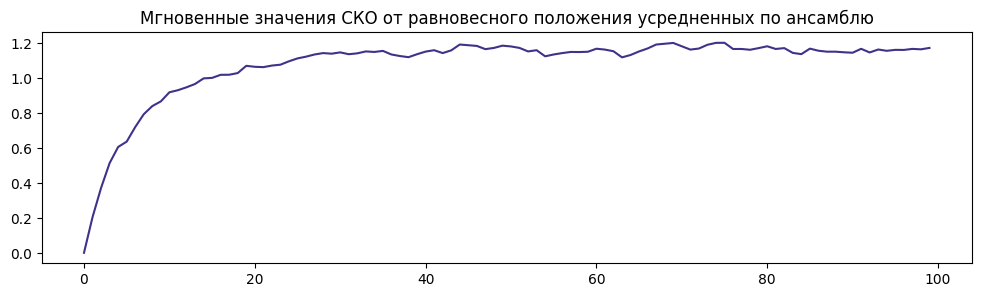

In [27]:
L = 50
NParticle = 2000
NTrial = 100
Xi , Yi , Site = InitL(L , NParticle)
X = np.arange(NTrial)

# Визуализация начальной конфигурации
fig = plt.figure(figsize=(6 , 6))

ax = fig.add_subplot(111)
ax.scatter(Xi , Yi , s = 8,color = "#423189")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Начальная конфигурация')

# Вычисление координат пешеходов а каждом шаге Монте Карло
C = MoveL(L , NParticle , NTrial , Xi , Yi , Site)

# Вычисление мгновенных значений СКО усредненных по ансамблю
Xx = np.empty(NTrial , dtype = float)
Yy = np.empty(NTrial , dtype = float)
for i in range(NTrial):
    Xx[i] = np.std(C[: , i , 0])
    Yy[i] = np.std(C[: , i , 1])
    
fig = plt.figure(figsize = (12 , 3))

ax = fig.add_subplot(111)
ax.plot(X , Xx , label = 'X',color = "#423189")
ax.plot(X , Yy , label = 'Y',color = "#423189")
ax.set_title('Мгновенные зачения СКО усредненных по ансамблю')
ax.legend(loc = 'upper left')

# Вычисление мгновенных значений СКО от равновесного положения усредненных по ансамблю
dR = np.empty(NTrial)
for i in range(NTrial):
    R2 = 0
    Xxx = C[: , i , 0]
    Yyy = C[: , i , 1]
    for j in range(NParticle):
        dx = Xxx[j] - Xi[j]
        dy = Yyy[j] - Yi[j]
        if abs(dx) > L / 2:
            dx = dx - dx / abs(dx) * L
        if abs(dy) > L / 2:
            dy = dy - dy / abs(dy) * L
        R2 += dx ** 2 + dy ** 2
    dR[i] = R2 / NParticle

fig = plt.figure(figsize=(12 , 3))

ax = fig.add_subplot(111)
ax.plot(X , dR, color = "#423189")
ax.set_title('Мгновенные значения СКО от равновесного положения усредненных по ансамблю')

## Выводы по работе

В ходе выполнения данной лабораторной работы были смоделированы различные физические явления. Для начала была построена траектория движения заряда в постоянном магнитном поле - спираль. После чего было произведено построение движение заряда с релятивистской скоростью (скоростью, близкой по значению к скорости света) в скрещенных электрическом и магнитных полях. При таких условиях заряд движется не вертикально вверх по спирали, а с отклонением.
Далее было выполнено построение движения частицы в магнитном поле диполя с начальной скоростью 1.55. После чего изменяя начальную скорость было выяснено что если брать значения меньше или больше от изначального, то наблюдаются отклонения в равномерных зависимостях.
Затем был рассмотрен метод Монте-Карло для случайных блужданий на отрезке и плоскости, а также для движения решеточного газа.
Так на отрезке была реализована функция, возвращающая значения случайной последовательности, а также построена гистограмма данной последовательности. После чего проанализировав гистограмму предположил, что значения случайной последовательности распределены по случайному закону, в результате чего была произведена проверка данного предположения. Вычислив теоретическое значение X^2, а также случайная последовательность для данного критерия, пришел к выводу, что предположение оказалось верным, так как значения x^2 не сильно отличаются между собой. Помимо этого, была реализована функция распределения для вычисления точных значений и построены графики, сравнив которые можно увидеть их сходство.
Затем были рассмотрены блуждания на плоскости. Была реализована функция, возвращающая мгновенных значений координат пешеходов, построены графики мгновенных значений координат и радиус-векторов 1 и 100 пешеходов, мгновенных значения квадрата координат и радиус-векторов и среднеквадратического отклонения усредненной траектории. С помощью последнего графика был сделан вывод, что с течением времени происходит линейное увеличение площади окружности, внутри которой находятся все пешеходы, а среднеквадратичное смещение меняется с увеличение числа шагов. Далее был реализован алгоритм моделирования персистентного случайного блуждания методом Монте-Карло.
Помимо этого, было смоделировано движение решеточного газа, проделав похожие действия, что и в прошлой задаче, но с другими начальными условиями.
